In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_dic = pd.read_excel('data_dictionary.xlsx')

In [3]:
df_dic.head()

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN


In [4]:
df_dic.shape

(52, 3)

In [5]:
df_employee=pd.read_csv('employee_survey_data.csv')
df_employee.head() # we can see relationship with 3 features.

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [6]:
df_employee['EnvironmentSatisfaction'].unique()

array([ 3.,  2.,  4.,  1., nan])

In [7]:
df_employee['JobSatisfaction'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [8]:
df_employee['WorkLifeBalance'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [9]:
df_general = pd.read_csv('general_data.csv')
df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [10]:
df_general.shape

(4410, 24)

In [11]:
df_manager=pd.read_csv('manager_survey_data.csv')
df_manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [12]:
df_manager.shape

(4410, 3)

In [13]:
df_general['EmployeeID'].equals(df_manager['EmployeeID']) #we can do merge.

True

In [14]:
df_general['EmployeeID'].equals(df_employee['EmployeeID'])

True

In [15]:
# merge based on 'EmployeeID'
df_general = df_general.merge(df_manager[['EmployeeID', 'JobInvolvement', 'PerformanceRating']], on='EmployeeID')
df_general.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,11,8,0,1.0,6,1,0,0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,23,8,1,6.0,3,5,1,4,2,4


In [16]:
df_general = df_general.merge(df_employee[['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance']], on='EmployeeID')
df_general.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0


In [17]:
df_general.info() # we can see data with isnull  --> this data is very clean. but I remove null data for analysis. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [18]:
df_general.dropna(inplace=True)

In [19]:
# about 2.5% data removed.
(4410-4300)/4410

0.024943310657596373

In [20]:
df_general.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,2.913256,1.0,2211.695116,2.066977,65059.844186,2.690000,15.210698,8.0,...,11.285116,2.796279,7.026047,2.190000,4.132558,2.728837,3.153953,2.723953,2.724884,2.761163
std,9.146517,8.097059,1.024774,0.0,1272.117692,1.106633,47045.398914,2.495764,3.662777,0.0,...,7.790052,1.290142,6.148036,3.230818,3.565831,0.710769,0.360946,1.093802,1.101875,0.707800
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1110.750000,1.000000,29260.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2215.500000,2.000000,49360.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3314.250000,3.000000,83802.500000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.250000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [21]:
df_general.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [38]:
df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,False,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,True,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,False,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,False,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,False,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


ValueError: object arrays are not supported

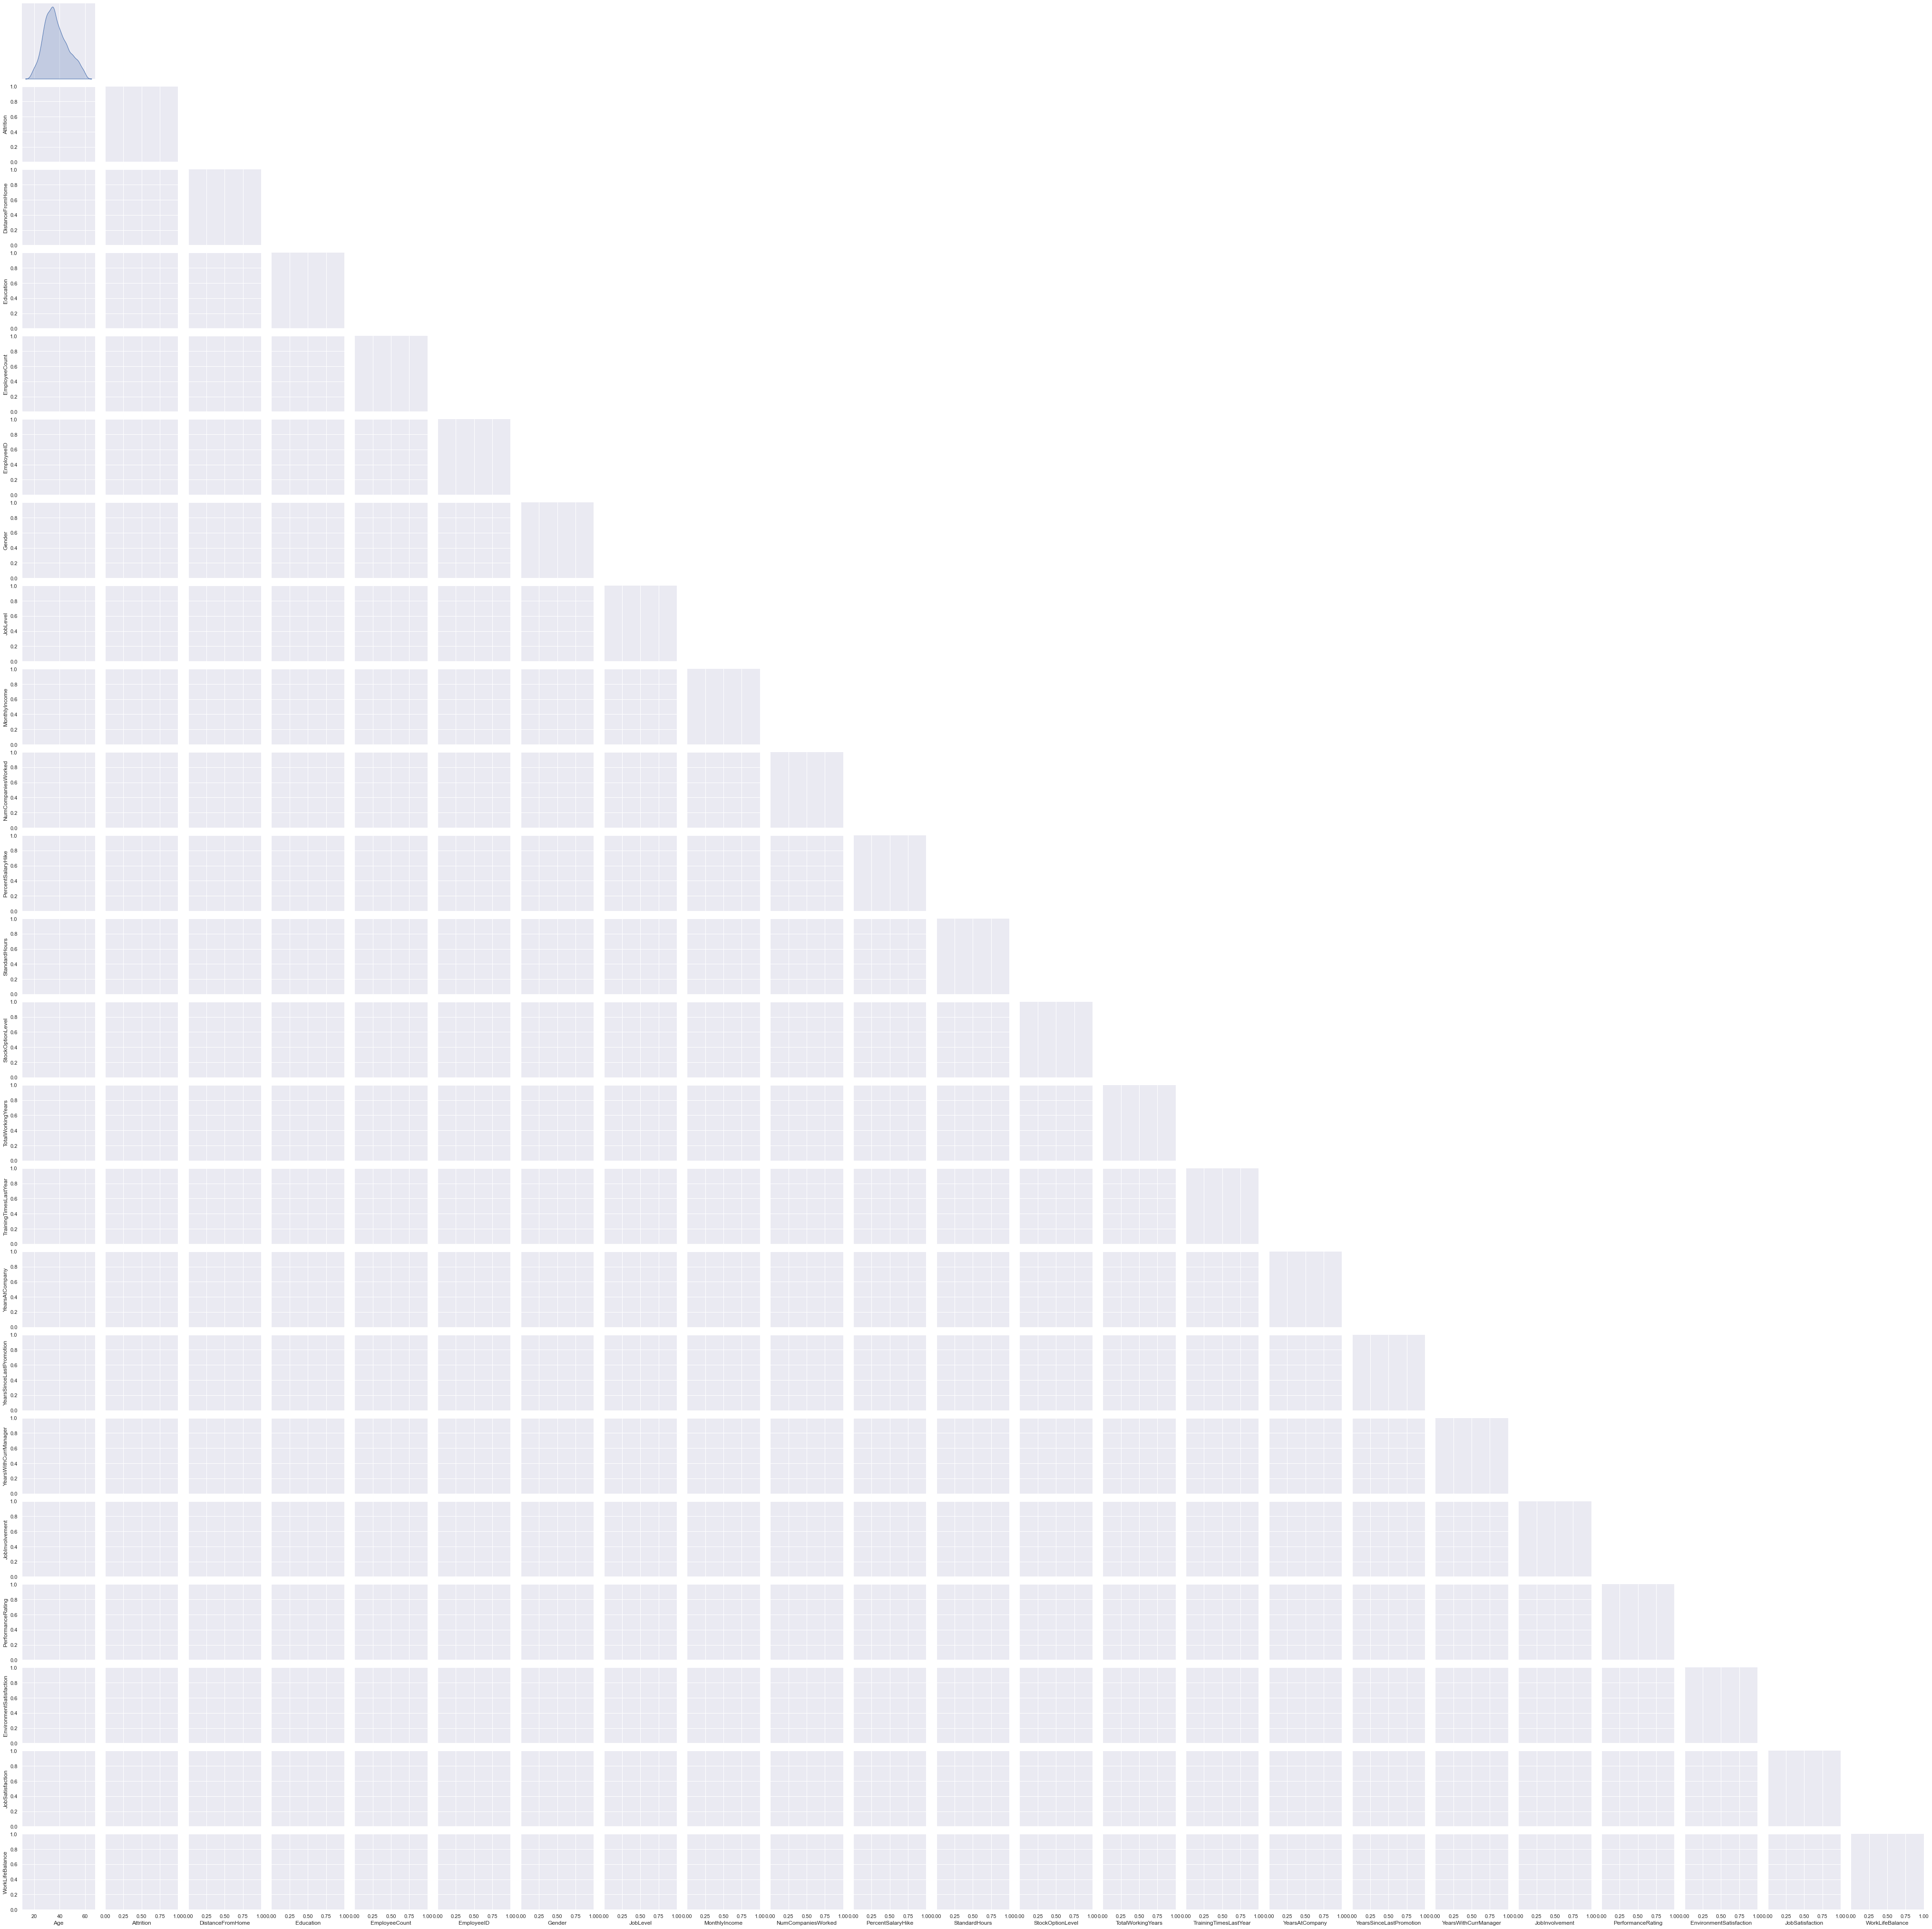

In [68]:
sns.pairplot(df_general, corner=True, diag_kind='kde')

### to do list (USML/SML)
1. data cleaning
1. EDA
1. PCA
1. K_means
1. recommender system
1. logistic regression
1. Random Forest
1. LinearRegression
1. streamlit

#### PCA analysis

In [32]:
!pip install umap-learn -q

In [33]:
import altair as alt

import seaborn as sns
sns.set()

In [49]:
df_to_cluster_p = df_general.loc[:,['Age','DistanceFromHome','Education']]

In [42]:
df_general = df_general.replace({'Gender': {'Male': True, 
                                'Female': False}}) 

In [45]:
df_general['Gender'].head()

0    False
1    False
2     True
3     True
4     True
Name: Gender, dtype: bool

In [43]:
# import and instantiate scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
# learn x-y relationships (principal components) and transform
df_to_cluster_scaled = scaler.fit_transform(df_to_cluster_p)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [53]:
data_to_cluster_minmax = scaler_min_max.fit_transform(df_to_cluster_p)

In [55]:
df_to_cluster

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction
0,51,False,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3,3,3.0
1,31,True,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,2,4,3.0
2,32,False,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,3,3,2.0
3,38,False,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,2,3,4.0
4,32,False,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,3,3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,False,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,8,0,6.0,2,6,1,5,2,3,3.0
4405,42,False,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10.0,5,3,0,2,3,3,4.0
4406,29,False,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10.0,2,3,0,2,2,3,4.0
4407,25,False,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5.0,4,4,1,2,3,4,1.0


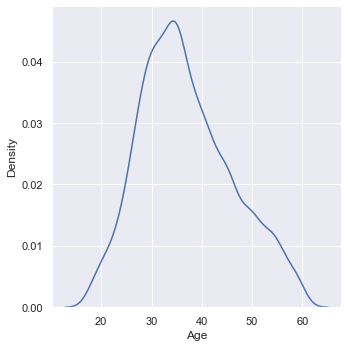

In [56]:
sns.displot(data=df_to_cluster_p, x="Age",kind="kde")

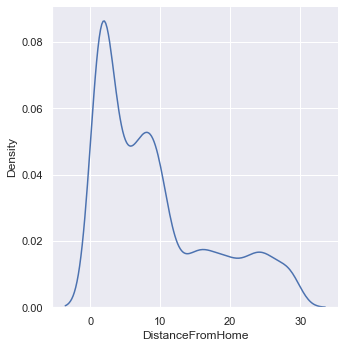

In [57]:
sns.displot(data=df_to_cluster_p, x="DistanceFromHome",kind="kde")

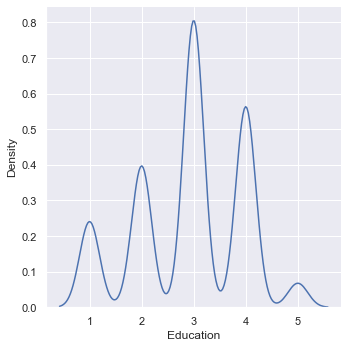

In [58]:
sns.displot(data=df_to_cluster_p, x="Education",kind="kde")

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [60]:
df_cluster_w = df_general.loc[:,['TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','StandardHours','StockOptionLevel']]

In [62]:
# fit-transform the data
df_reduced_pca = pca.fit_transform(df_cluster_w)

In [63]:
print(pca.components_)

[[ 7.55517087e-01 -4.16883598e-03  5.65038315e-01  2.02549767e-01
   2.62452858e-01 -0.00000000e+00  5.86547640e-04]
 [ 6.51274477e-01 -1.09099786e-02 -5.94587432e-01 -2.72002708e-01
  -3.84960736e-01 -0.00000000e+00 -2.84111885e-03]]


In [64]:
pca.components_.shape

(2, 7)

In [65]:
print(pca.explained_variance_ratio_)

[0.73035408 0.17026944]


C:\Users\dicod\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

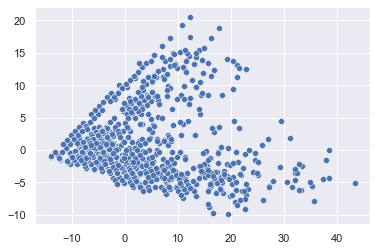

In [67]:
sns.scatterplot(df_reduced_pca[:,0],df_reduced_pca[:,1])

In [22]:
# result has Yes or no, so I decide to use Logistic Regression.
X = df_general.iloc[:,1].values
# X = df.values
# X = df.to_numpy()
X[:5]

array(['No', 'Yes', 'No', 'No', 'No'], dtype=object)

In [23]:
import matplotlib.pyplot as plt

In [24]:
df_general = df_general.replace({'Attrition': {'Yes': True, 
                                'No': False}}) 

In [25]:
df_general['Attrition']

0       False
1        True
2       False
3       False
4       False
        ...  
4404    False
4405    False
4406    False
4407    False
4408    False
Name: Attrition, Length: 4300, dtype: bool

In [26]:
y = df_general.iloc[:,1].values
X = df_general.iloc[:,-2].values

In [27]:
X

array([4., 2., 2., ..., 4., 3., 1.])

In [28]:
X.reshape(-1,1)

array([[4.],
       [2.],
       [2.],
       ...,
       [4.],
       [3.],
       [1.]])

In [29]:
y

array([False,  True, False, ..., False, False, False])

In [30]:
# Supervised ML
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1)

In [31]:
# Make Logistic model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[4. 4. 4. ... 2. 2. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# a person with jobsatisfation is 1, attrition of work is 77.5%

classifier.predict_proba([[1]])

In [ ]:
classifier.predict_proba([[2]])

In [ ]:
classifier.predict_proba([[3]])

In [ ]:
classifier.predict_proba([[4]])

In [ ]:
classifier.predict_proba([[5]])

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
classifier.score(X_test,y_test)

In [ ]:
# P = 1/(1+np.exp(-y)) --> y=mx+b
p=1/(1+np.exp(-(classifier.coef_ * X_train + classifier.intercept_))) # y= mx +b
p

In [ ]:
p= p.reshape(-1)